                                                       PROJEK AKHIR KECERDASAN BUATAN
                                            IMAGE PROCESSING - KLASIFIKASI KEBAKARAN ATAU BUKAN

                                            KELOMPOK 3-A1 :
                                            1. 2109106006 --> Kania Putri Ananda
                                            2. 2109106012 --> Nurmedina Maulidiah
                                            3. 2109106025 --> Rismayanti

## Job Desk Anggota Kelompok

    1. Kania Putri Ananda  : - Mencari Dataset
                             - Data Preprocessing
                             - Data Analysis
                             - Dokumentasi
    2. Nurmedina Maulidiah : - Mencari Dataset
                             - Data Collecting
                             - Data Visualisasi
                             - Dokumentasi
    3. Rismayanti          : - Data Augmentasi
                             - Data Modelling
                             - Evaluasi dan Prediksi
                             - Dokumentasi

# **1. Data Collecting**
- Berisikan meta data dari dataset

Sumber Dataset = https://www.kaggle.com/datasets/phylake1337/fire-dataset

Jumlah Dataset = 999 Data

Bentuk Dataset = Citra

## Library Utama
- os = agar python langsung berinteraksi dengan sistem operasi
- tensorflow =  library untuk Machine Learning yang dapat digunakan untuk melakukan berbagai macam tugas namun Tensorflow lebih berfokus pada Training, Interfacing dan Deep Neural Network
- numpy = untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python
- shutil = berfungsi untuk melakukan operasi file dan direktori yang berbeda.
- random = menghasilkan angka acak


In [79]:
import os
import tensorflow as tf
import numpy as np
import shutil
import random

## Direktori untuk menyimpan dataset
- path sebagai tempat penyimpanan dataset utama yang belum displitting
- path baru akan menyimpan dataset yang telah displit

In [89]:
path = 'D:/Kelompok3-PA-KB/Dataset/'

## Menampilkan jumlah class yang ada pada dataset
- Pengklasifikasian terdiri dari 2 jenis class yaitu fire dan Non Fire
- Jika Klasifikasi gambar termasuk Fire berarti kebakaran
- Jika termasuk Non Fire termasuk tidak kebakaran

In [81]:
new_classes = ['Fire', 'Non Fire']

In [113]:
print(f"JUMLAH CLASS : {len(new_classes)}")
print("----------------") 
print(f"1. {new_classes[0]}")
print(f"2. {new_classes[1]}")

JUMLAH CLASS : 2
----------------
1. Fire
2. Non Fire


## Import from PIL import Image
 Untuk membuka file gambar

In [82]:
from PIL import Image

## Menampilkan Resolusi Gambar

In [83]:
for x in new_classes:
    path = os.path.join(dataset, x)
    print(x)
    print("-------------------------------")
    images = os.listdir(path)
    for z in range(5):
        img_path = os.path.join(path, images[z])
        img = Image.open(img_path)
        print(f"{z+1}. Size Gambar : {img.size}\n")

Fire
-------------------------------
1. Size Gambar : (860, 460)

2. Size Gambar : (450, 338)

3. Size Gambar : (600, 338)

4. Size Gambar : (674, 485)

5. Size Gambar : (530, 298)

Non Fire
-------------------------------
1. Size Gambar : (4367, 3275)

2. Size Gambar : (700, 467)

3. Size Gambar : (1600, 1000)

4. Size Gambar : (700, 500)

5. Size Gambar : (800, 600)



In [90]:
path = 'D:/Kelompok3-PA-KB/Dataset/'
path_baru = 'D:/Kelompok3-PA-KB/Split Dataset/'

## Melakukakan spliting folder
 ### 80% Training Data
 ### 20% Validation Data
 
 - os.makedirs = untuk membuat direktori secara rekursif
 - os.listdir = untuk mendapatkan list semua file yg ada di direktori temp
 - random.shuffle = urutan diubah tapi isinya sama
 - np.split = membagi array menjadi sub-array
 - shutil.copy = mengcopy file ke direktori baru

- Perulangan hanya dijalankan sekali jika telah membagi folder

In [93]:
for cls in new_classes:
    os.makedirs(path_baru + 'Training Data/' + cls)
    os.makedirs(path_baru + 'Validation Data/' + cls)

In [94]:
for cls in new_classes:
    temp = path + cls
    print(temp)

    all_dataset = os.listdir(temp)
    np.random.shuffle(all_dataset)

    split_train, split_val = np.split(np.array(all_dataset),[int(len(all_dataset)*0.80)])
    
    print(f"\n{cls}")
    print(f"--------------------------")
    print(f"Total Images      :  {len(all_dataset)}")
    print(f"Total Training    :  {len(split_train)}")
    print(f"Total Validation  :  {len(split_val)}\n")

    split_train = [temp +'/'+ name for name in split_train]
    split_val = [temp+'/' + name for name in split_val]
    
    for name in split_train:
        shutil.copy(name, path_baru + 'Training Data/'+ cls )
  
    for name in split_val:
        shutil.copy(name, path_baru +'Validation Data/'+cls )

D:/Kelompok3-PA-KB/Dataset/Fire

Fire
--------------------------
Total Images      :  755
Total Training    :  604
Total Validation  :  151

D:/Kelompok3-PA-KB/Dataset/Non Fire

Non Fire
--------------------------
Total Images      :  239
Total Training    :  191
Total Validation  :  48



In [95]:
class_names = new_classes
class_names

['Fire', 'Non Fire']

In [96]:
dataset = os.path.join(path)
print(os.listdir(dataset))

['Fire', 'Non Fire']


## Mengatur Jumlah Batch Size
- Batch size akan berjumlah 8 sehingga model yang dilatih akan lebih banyak pada setiap epochnya

In [99]:
batch_size = 8

print("batch_size =", batch_size)

batch_size = 8


# **2. Data Analysis dan Visualization**

## Import Fungsi Keras Preprocessing Image pada library Image Data Generator
 Untuk membuat data generator pada gambar

In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Melakukan proses analisis sebelum melakukan proses Augmentasi
- rescale : proses mengubah ukuran gambar menjadi 1./255
- target_size : Jumlah dimensi data citra akan digunakan dalam proses training
- batch_size : Jumlah banyaknya citra yang dimasukan dalam setiap steps training
- shuffle : data didalam folder tersebut diacak sehingga tidak sesuai urutan yang ada seperti urutan alfabetik.
- class_mode : metode pemilihan klasifikasi
- subset : untuk mengambil data sesuai jenis datanya

 

In [101]:
img_path = 'D:/Kelompok3-PA-KB/Split Dataset/Training Data'

In [102]:
datagen_befAug= ImageDataGenerator(
    rescale = 1./255,
)

In [103]:
train_befAug = datagen_befAug.flow_from_directory(img_path,
                                           target_size =(100, 100),
                                           batch_size = batch_size,
                                           shuffle = True,
                                           class_mode = 'binary',
                                           subset = 'training')

val_befAug = datagen_befAug.flow_from_directory(img_path,
                                           target_size =(100, 100),
                                           batch_size = batch_size,
                                           shuffle = True,
                                           class_mode = 'binary',
                                           subset = 'validation')


Found 795 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


## Import Matplotlib
 Untuk melakukan visualisasi

In [178]:
import matplotlib.pyplot as plt

## Melakukan Visualisasi data sebelum melakukan proses augmentasi

- plt.figure figsize = menentukan lebar dan tinggi dalam satuan inci yaitu 10x10
- plt.subplot = banyak plot dalam satu gambar 
- plt.imshow = menampilkan data sebagai gambar
- plt.title = memberi judul pada visualisasi yang ditampilkan
- plt.axis = menentukan batas x dan y tapi disini dimatikan

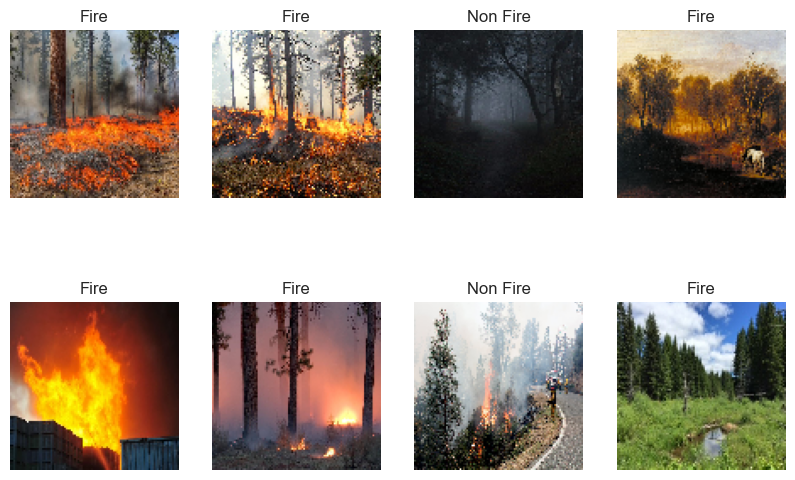

In [179]:
plt.figure(figsize=(10, 10))

images, labels = train_befAug.next()

for i in range (8):
    plt.subplot(3, 4, i+1)
    plt.imshow(train_befAug[0][0][i])
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis('off')

# **3. Data Preprocessing**

## Proses Augmentasi Gambar
Augmentasi data adalah suatu proses dalam pengolahan data gambar, augmentasi merupakan proses mengubah atau memodifikasi gambar sedemikian rupa sehingga komputer akan mendeteksi bahwa gambar yang diubah adalah gambar yang berbeda, namun manusia masih dapat mengetahui bahwa gambar yang diubah tersebut adalah gambar yang sama
- rescale : proses mengubah ukuran gambar menjadi 1./255
- rotation_range : yaitu dengan merotasi atau melakukan perputaran pada gambar sebesar 0.20
- width_shift_range : proses melakukan pergeseran lebar pada gambar sebesar 0.2
- height_shift_range : melakukan pergeseran tinggi pada gambar sebesar 0.2he
- shear_range : proses yang digunakan untuk menambah gambar sehingga komputer dapat melihat bagaimana manusia melihat sesuatu dari sudut yang berbeda.
- zoom_image : : proses zoom gambar sebesar 0.2
- horizontal_flip : proses membalik gambar secara horizontal
- validation_split : proses validasi sederhana
-  fill_mode : proses mengisi ruang kosong pada gambar




In [104]:
datagen_Aug = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.5,
    horizontal_flip = True,
    validation_split = 0.1,
    fill_mode = 'nearest'
)

## Flow pada  Data
Agar mengatahui data berasal dari folder lokal

In [105]:
train_path = 'D:/Kelompok3-PA-KB/Split Dataset/Training Data'
val_path = 'D:/Kelompok3-PA-KB/Split Dataset/Validation Data'

#### batch_size : Jumlah banyaknya citra yang dimasukan dalam setiap steps training dalam setiap iterasi/epoch

- color_mode = menentukan warna yaitu rgb
- target_size = membuat gambar menjadi ukuran 100x100
- batch_size = menentukan ukuran batch sizenya yaitu 8
- shuffle = untuk mengacak data
- class_mode = metode pemilihan klasifikasi yaitu binary karna hanya ada dua klasifikasi
- subset = data yang diambil adalah training/validation

In [106]:
training_Aug = datagen_Aug.flow_from_directory(
    train_path,
    color_mode='rgb',
    target_size =(100, 100),
    batch_size = batch_size,
    shuffle = True,
    class_mode = 'binary',
    subset = 'training')

validation_Aug = datagen_Aug.flow_from_directory(
    val_path,
    color_mode='rgb',
    target_size =(100, 100),
    batch_size = batch_size,
    shuffle = True,
    class_mode = 'binary',
    subset = 'validation')


Found 716 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


## Melakukan visualisasi setelah proses Augmentasi
- next = digunakan untuk mendapatkan item berikutnya dari iterator
- tf.argmax = mengembalikan index dg nilai maksimum/terbesar di seluruh axis tensor

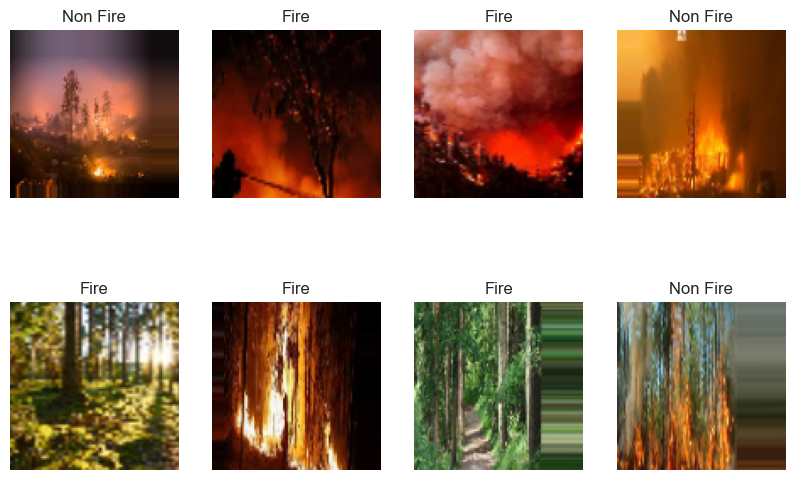

In [172]:
plt.figure(figsize=(10,10))
img, label = training_Aug.next()
           
for i in range (8):
    ax = plt.subplot(3,4, i+1)
    plt.imshow(training_Aug[0][0][i])
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis('off')

# **4. Data Modelling**

In [107]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Model
##### Membuat Arsitektur Model
- Model Neural Netword : Sequential
- Conv2D : digunakan untuk untuk menjalankan operasi konvolusional pada gambar latih
- MaxPooling2D : digunakan untuk operasi pooling yang bertujuan bertujuan untuk mereduksi ukuran gambar sebanyak mungkin
- Flatten : digunakan untuk fungsi flatteningnya
- Dense : digunakan untuk menjalankan full connection neural network
- kernel_size : ukuran filter convolution 3x3
- padding : ketika ukuran input dan ukuran kernel tidak pas sempurna
- input shape : bertipe RGB

#### 1. Input Layer
- Convolution 2D 
- Filters yang digunakan 256
- Kernel Size yang digunakan 3
- Paddingnya adalah Same
- Activationnya yaitu relu
- Input shapenya RGB
- MaxPool2D untuk melihat warna yang paling sering muncul

#### 2. Hidden Layer
- Convolution 2D 
- Filters yang digunakan 256
- Kernel Size yang digunakan 3
- Paddingnya adalah Same
- Activationnya yaitu relu

#### 3. Output Layer
- units 1
- activation sigmoid karena hanya terdiri dari 2 class

In [108]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size=3, padding = 'same', activation = 'relu',input_shape = [100, 100, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size=3, padding = 'same', activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, padding = 'same',activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units = 64,activation = 'relu'))

cnn.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid'))

## Paramater Layer

In [109]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

## Melakukan Callback
### untuk mengehentikan pelatihan model ketika sudah mencapai akurasi lebih dari 95% sehingga tidak terjadi over fitting

- self = variabel yang menyatakan kelas itu sendiri
- Pelatihan model akan berhenti jika accuracy dn val_accuracy lebih dari 95 dan loss valnya kurang dari 30

In [110]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}): 
        if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95 and logs.get('val_loss') < 0.30):
            self.model.stop_training = True
            
callback = myCallback()

## Compile Model
- Optimizer : merupakan metode optimasi yang digunakan
- loss : adalah metode pengukuran nilai loss berdasarkan pada nilai apa. Karena nilai klasis=fikassi pada data bernilai biner (0,1) maka kita menggunakan 'binary_crossentropy'
- Metrics : Nilai matriks yang diukur pada project ini kita menggunakan nilai akurasi sebagai nilai pengukurannya

In [111]:
cnn.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## Melatih Model
- .fit_generator di\gunakan saat kita memiliki kumpulan data yang sangat besar untuk masuk ke dalam memori kita atau saat augmentasi data perlu diterapkan.
- Melatih model sebanyak 50 epochs tetapi jika accuracy dan loss yang diinginkan tercapai maka proses dihentikan oleh callbacks
- Step untuk setiap epoch adalah sample training//batch size
- validation step adalah sample validasi//batch size

In [112]:
hist = cnn.fit_generator(training_Aug, validation_data = validation_Aug, epochs=50,
                  steps_per_epoch = training_Aug.samples//batch_size,
                  validation_steps = validation_Aug.samples//batch_size,
                  callbacks=callback 
                 )

C:\Users\Latitude 5480\AppData\Local\Temp\ipykernel_13376\591926264.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = cnn.fit_generator(training_Aug, validation_data = validation_Aug, epochs=50,


Epoch 1/50
89/89 [==============================] - 88s 963ms/step - loss: 0.4530 - accuracy: 0.7994 - val_loss: 0.4172 - val_accuracy: 0.8125
Epoch 2/50
89/89 [==============================] - 82s 919ms/step - loss: 0.2783 - accuracy: 0.9124 - val_loss: 0.4542 - val_accuracy: 0.8125
Epoch 3/50
89/89 [==============================] - 83s 933ms/step - loss: 0.1614 - accuracy: 0.9167 - val_loss: 0.4408 - val_accuracy: 0.8125
Epoch 4/50
89/89 [==============================] - 85s 952ms/step - loss: 0.1381 - accuracy: 0.9463 - val_loss: 0.4408 - val_accuracy: 0.9375
Epoch 5/50
89/89 [==============================] - 84s 948ms/step - loss: 0.1497 - accuracy: 0.9576 - val_loss: 0.2834 - val_accuracy: 0.8125
Epoch 6/50
89/89 [==============================] - 84s 930ms/step - loss: 0.1338 - accuracy: 0.9477 - val_loss: 0.4261 - val_accuracy: 0.8125
Epoch 7/50
89/89 [==============================] - 83s 929ms/step - loss: 0.1194 - accuracy: 0.9548 - val_loss: 0.1325 - val_accuracy: 0.9375

## Evaluasi

In [118]:
cnn.evaluate(validation_Aug, verbose=1)

3/3 [==============================] - 1s 164ms/step - loss: 0.1398 - accuracy: 0.9474


[0.1398446410894394, 0.9473684430122375]

## Menyimpan hasil training dalam format file h.5

In [119]:
cnn.save('Model/Model.h5')

# **5. Evaluasi**


- set_theme = menetapkan tema visual untuk semua plot matplotlib dan seaborn
- plt.suptitle = menambahkan judul di tengah gambar
- plt.subplot = gambar tersebut memiliki 1 baris, 2 kolom, dan plot ini adalah plot pertama/kedua
- xticks = mengatur lokasi berdasarkan epoch 

## Import Library Seaborn
- untuk menampilkan grafik

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

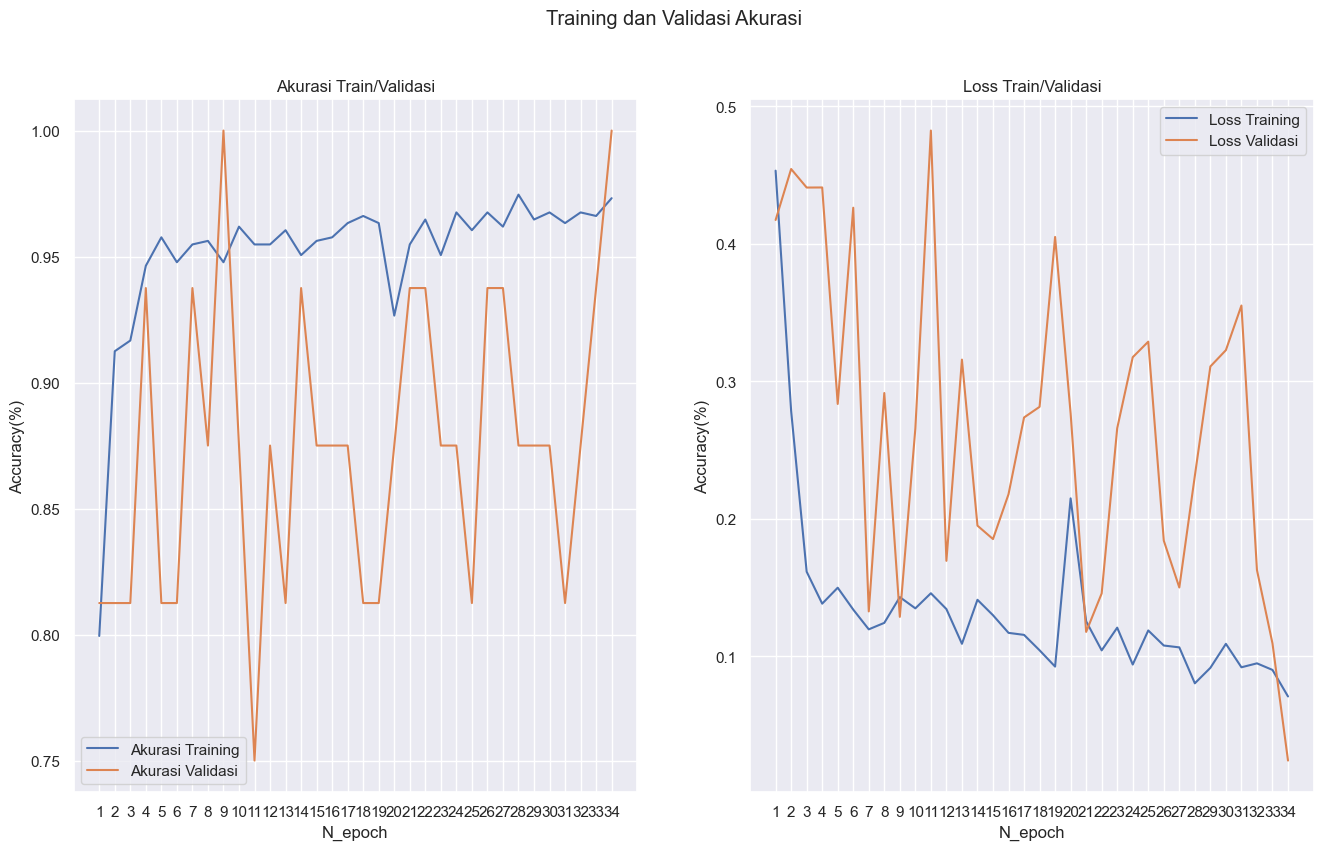

In [124]:
epoch = [i+1 for i in range(34)]
sns.set_theme()
plt.figure(figsize = (16,9))
plt.suptitle('Training dan Validasi Akurasi')

plt.subplot(1,2,1)
sns.lineplot(x=epoch, y=hist.history['accuracy'], label = "Akurasi Training")
sns.lineplot(x=epoch, y=hist.history['val_accuracy'], label = "Akurasi Validasi")

plt.xticks(epoch)
plt.xlabel('N_epoch')
plt.ylabel('Accuracy(%)')
plt.title('Akurasi Train/Validasi')

plt.subplot(1,2,2)
sns.lineplot(x=epoch, y=hist.history['loss'], label = "Loss Training")
sns.lineplot(x=epoch, y=hist.history['val_loss'], label = "Loss Validasi")

plt.xticks(epoch)
plt.xlabel('N_epoch')
plt.ylabel('Accuracy(%)')
plt.title('Loss Train/Validasi')

plt.show()

## Prediksi Data Validasi

In [125]:
import numpy as np

1/1 [==============================] - 0s 64ms/step


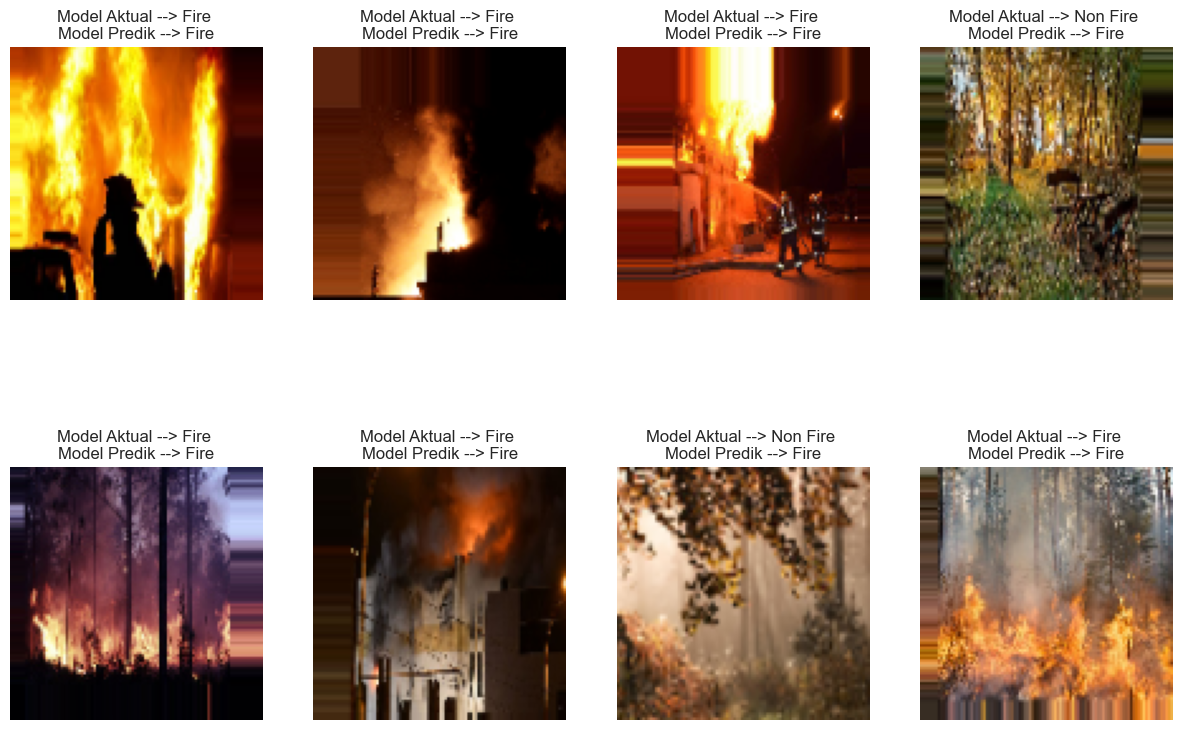

In [127]:
image, label = next(iter(validation_Aug))

plt.figure(figsize=(15,10))
for i in range(8) :
    plt.subplot(2,4,i+1)
    plt.axis('off')
    predict = cnn.predict(image[i][None])
    plt.imshow(image[i])
    plt.title(f'Model Aktual --> {class_names[int(label[i])]} \nModel Predik --> {class_names[int(predict[0][0])]}')

## Melakukan Prediksi
- image.load_img = untuk memuat gambar
- iamge.img_to_array = mengconvert PIL image ke numpy array
- np.expand_dims = memperluas bentuk array
- cnn.predict = memprediksi label nilai data berdasarkan model yang dilatih
- PIL.Image.open = membuka file gambar
- plt.imshow = menampilkan data sebagai gambar

In [128]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import PIL #pyhton image library untuk memanipulasi gambar

### Load Model

In [129]:
cnn = load_model('Model/Model.h5')

In [130]:
testing = r'D:/Kelompok3-PA-KB/Testing Data/fire.2.PNG'

### Prediksi Gambar dari Data Testing

1/1 [==============================] - 0s 133ms/step


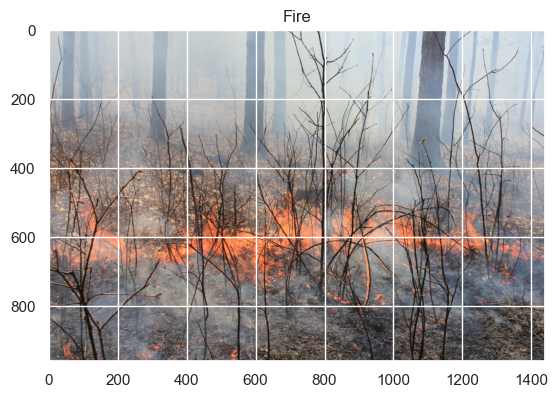

In [131]:
test_image=image.load_img(testing, target_size=(100,100))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)

image_show=PIL.Image.open(testing)
plt.imshow(image_show)

plt.title(class_names[int(result[0][0])])
plt.show()